In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load Train Data Set 

In [2]:
df_tr = pd.read_csv("../res/train.csv")
df_tr.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data exploration - NA 

In [6]:
df_tr.isnull().sum() * 100 / len(df_tr)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

## Home Planet
> Check if we can't reconstitute the value per group

In [7]:
df_home = df_tr[['PassengerId', 'HomePlanet']]

In [12]:
df_home['GroupId'] = df_home['PassengerId'].str[0:4].astype(int)

C:\Users\lopes\AppData\Local\Temp\ipykernel_32500\769741254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home['GroupId'] = df_home['PassengerId'].str[0:4].astype(int)


In [39]:
df_gp_home = df_home.groupby('GroupId')['HomePlanet'].agg(['unique', 'nunique'])
na_groupid = df_home[df_home['HomePlanet'].isna()]['GroupId'].unique()
df_gp_home.loc[na_groupid]

,unique,nunique
GroupId,,
64,"[Mars, nan]",1
119,"[nan, Europa]",1
210,[nan],0
242,[nan],0
251,[nan],0
...,...,...
9084,[nan],0
9194,"[nan, Europa]",1
9248,[nan],0


array([  64,  119,  210,  242,  251,  303,  315,  321,  382,  402,  444,
        445,  470,  504,  518,  539,  540,  560,  594,  665,  772,  853,
        911,  988, 1024, 1056, 1063, 1071, 1089, 1347, 1385, 1458, 1467,
       1645, 1698, 1812, 1823, 1865, 1926, 1978, 2024, 2055, 2060, 2312,
       2319, 2384, 2392, 2404, 2443, 2451, 2461, 2505, 2506, 2597, 2618,
       2642, 2688, 2730, 2799, 2814, 2817, 2822, 2908, 2953, 2992, 3013,
       3131, 3172, 3215, 3331, 3361, 3417, 3439, 3520, 3523, 3570, 3624,
       3703, 3761, 3790, 3826, 3866, 3896, 3911, 4030, 4078, 4134, 4172,
       4207, 4212, 4216, 4300, 4365, 4371, 4440, 4451, 4501, 4596, 4625,
       4648, 4655, 4822, 4840, 4883, 4933, 5014, 5090, 5137, 5187, 5359,
       5367, 5406, 5424, 5427, 5445, 5451, 5465, 5555, 5603, 5684, 5799,
       5810, 5826, 5939, 5981, 5989, 6031, 6032, 6036, 6065, 6108, 6262,
       6263, 6313, 6339, 6356, 6363, 6374, 6402, 6405, 6490, 6512, 6552,
       6561, 6623, 6634, 6810, 6926, 6954, 6972, 69

,unique,nunique
GroupId,,
64,"[Mars, nan]",1
119,"[nan, Europa]",1
210,[nan],0
242,[nan],0
251,[nan],0
...,...,...
9084,[nan],0
9194,"[nan, Europa]",1
9248,[nan],0


In [ ]:
df[['a' in x for x in df['lists'].values]]

In [29]:
df_gp_home[[s in x for x in df_gp_home['unique'].values]]

,unique,nunique
GroupId,,


In [14]:
df_home[df_home['HomePlanet'].isna()]

,PassengerId,HomePlanet,GroupId
59,0064_02,NaN,64
113,0119_01,NaN,119
186,0210_01,NaN,210
225,0242_01,NaN,242
234,0251_01,NaN,251
...,...,...,...
8515,9084_01,NaN,9084
8613,9194_01,NaN,9194
8666,9248_01,NaN,9248
8674,9257_01,NaN,9257


# Data Preparation
As we can see, some of the current data are still in string, which is hard to process with for a ML Algorithms. 
We will prepare the data based on what we know about the Data Field. 

## PasengerId
We know from the description that PassengerID take the form <code>gggg_pp</code> where : 
- <code>gggg</code> group number with who the passenger is travelling with
- <code>pp</code> Id of this person in the group

We will not be interested by the Person Id within the group, but the group number could be an useful information as it will allow us to cluster Passenger together. It might not be surprising to have passenger in the same group having a higher chance to be in the same final category (meaning Transported or not transported). 


In [3]:
# We create the new fields GroupID
df_tr["GroupId"] = df_tr["PassengerId"].apply(lambda x: int(x[0:4])) 
# Place the new column just after PassengerId 
cols = df_tr.columns.to_list()
cols = [cols[0]] + [cols[-1]] + cols[1:-1]
df_tr = df_tr[cols]
# Show Results 
df_tr.head()

,PassengerId,GroupId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,2,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,3,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [47]:
# Pairplot numerical (not catgorical) data with transported target

colums = ['GroupId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck','Transported']
df_plt = df_tr[colums]

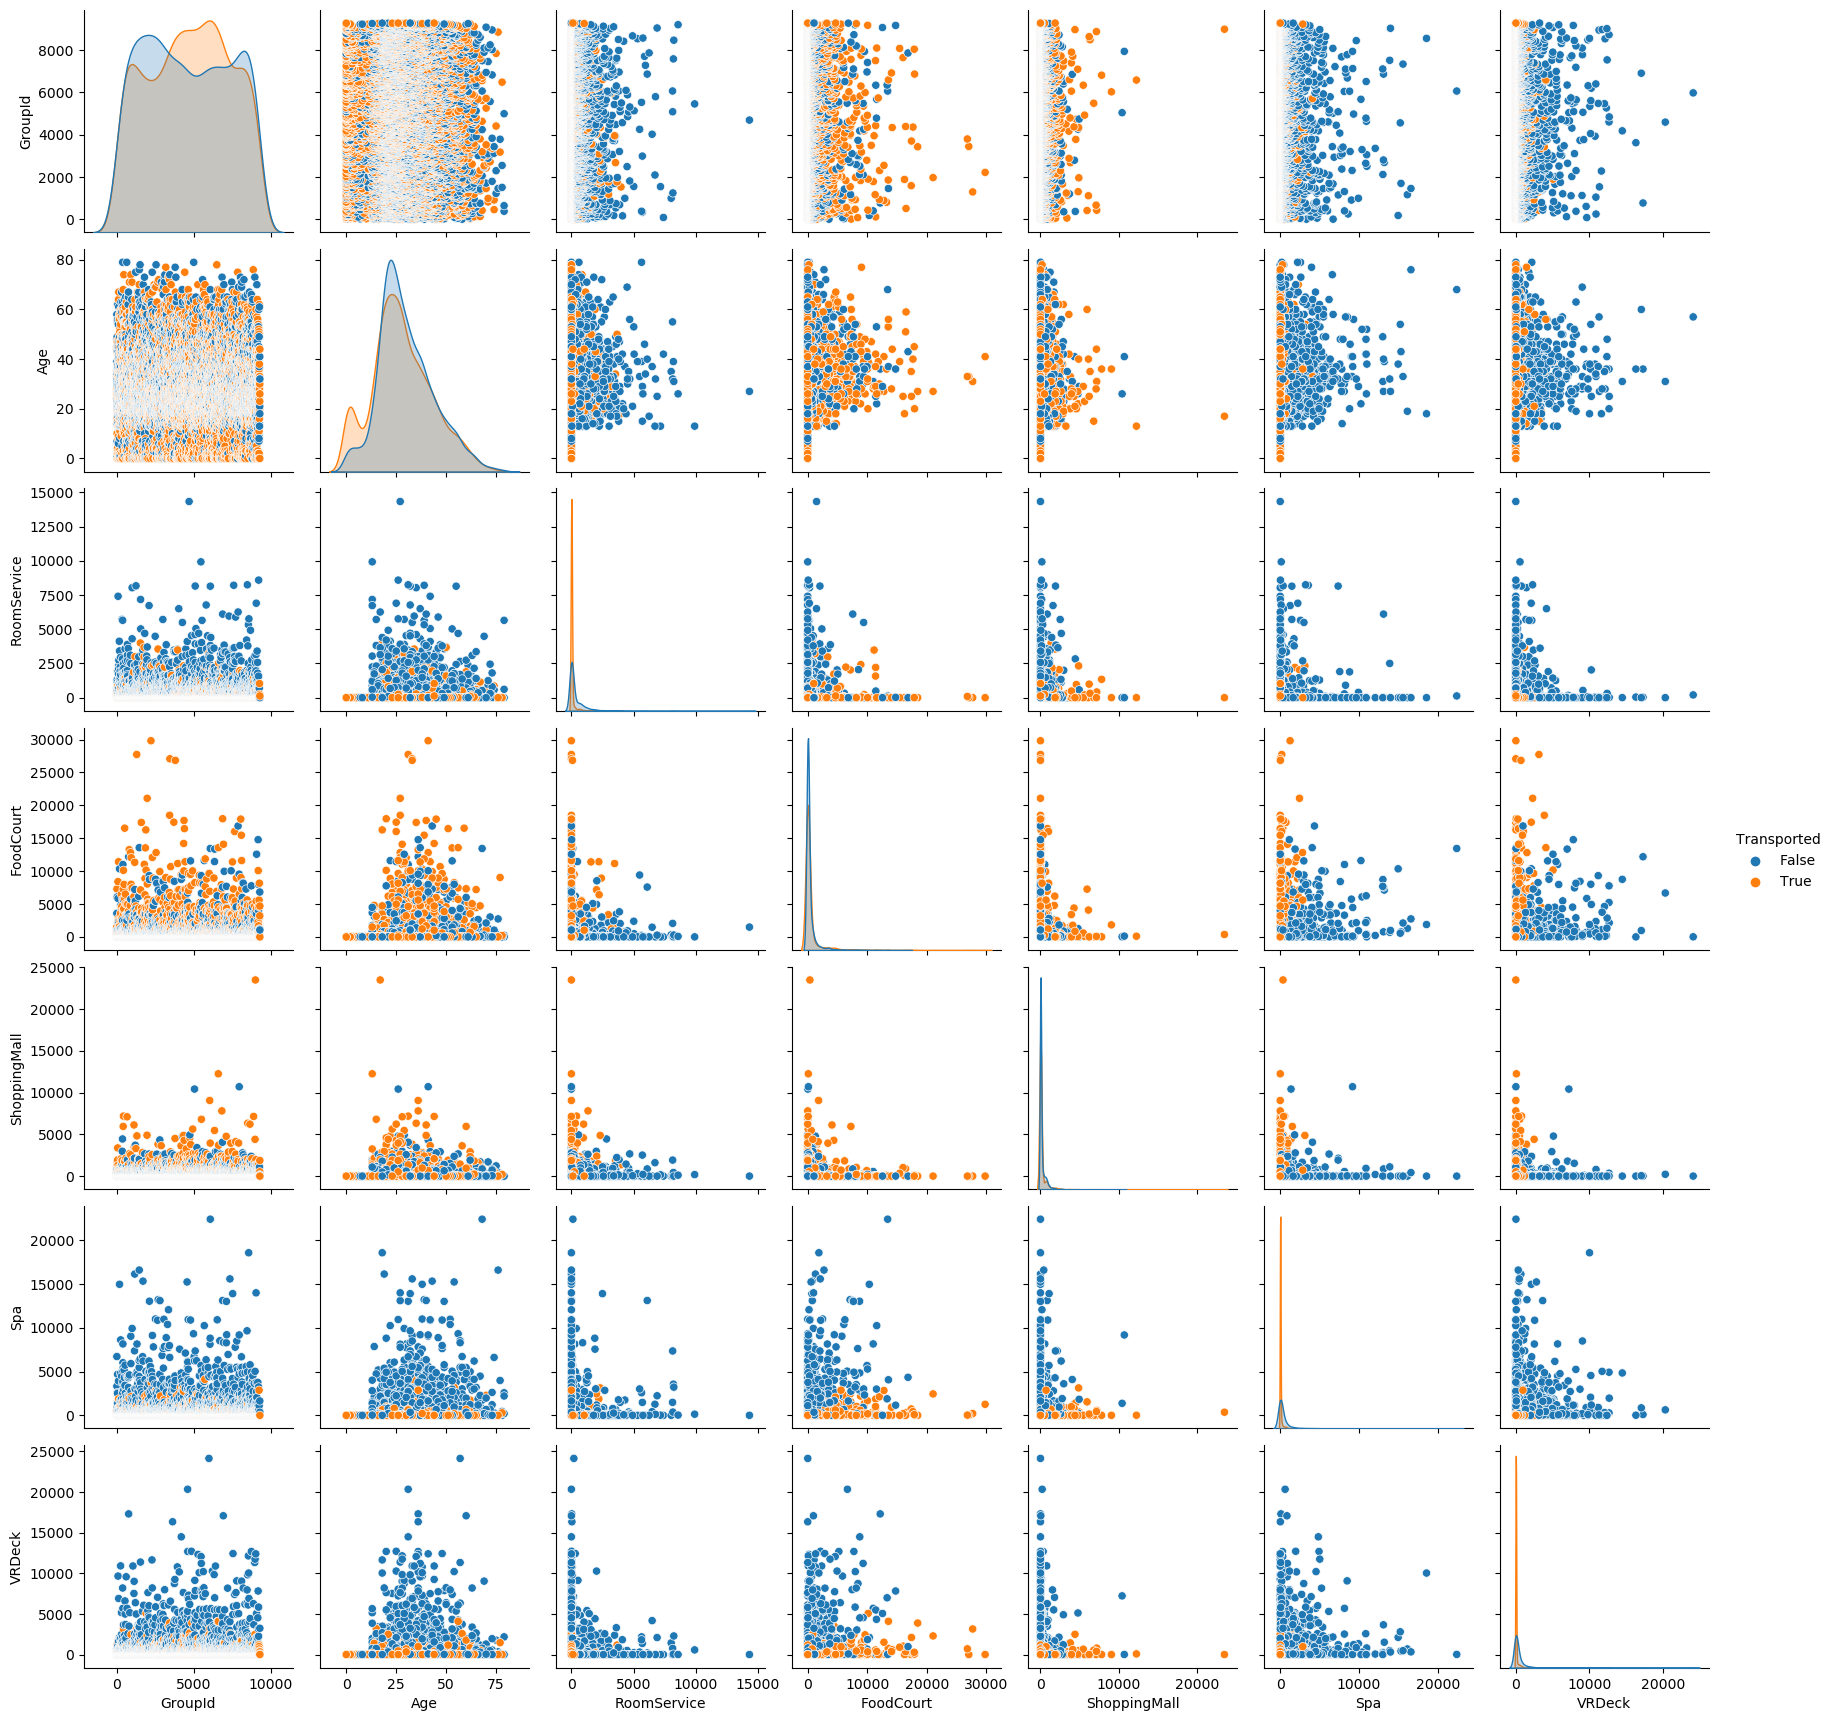

In [48]:
# Basic correlogram
sns.pairplot(df_plt, hue= 'Transported')
plt.show()

In [49]:
df_tr.['VRDeck','Transported']

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [7]:
enc_home = OneHotEncoder(handle_unknown= 'ignore')
enc_home.fit(df_tr.HomePlanet.values)

ValueError: Expected 2D array, got 1D array instead:
array=['Europa' 'Earth' 'Europa' ... 'Earth' 'Europa' 'Europa'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
df_tr.HomePlanet.values.shape

(8693,)

In [5]:
enc_home.n_features_in_

8693

In [38]:
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male'], ['Female'], ['Female']]
enc.fit(X2)

OneHotEncoder(handle_unknown='ignore')

In [39]:
enc.categories_

[array(['Female', 'Male'], dtype='<U6')]

In [36]:
X2 = np.array(X)
X3 = df_tr.HomePlanet.values

In [40]:
X2

array([['Male'],
       ['Female'],
       ['Female']], dtype='<U6')

In [41]:
X3

array(['Europa', 'Earth', 'Europa', ..., 'Earth', 'Europa', 'Europa'],
      dtype=object)

In [23]:
cols

['PassengerId',
 'GroupId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [ ]:
# in discovery show that home planet from people in same group have save home planet 